In [2]:
import numpy as np
import matplotlib.pyplot as plt

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

We define a function which is a cosine. We will try to fit it with a polynomial. We generate $N = 30$ data points of the form $(x, f(x) + \mathtt{noise})$ randomly. The noise is made from small random numbers.

In [4]:
def f(X):return np.cos(1.5 * np.pi * X)

np.random.seed(0)
N = 30
X = np.sort(np.random.rand(N))
y = f(X) + np.random.randn(N) * 0.1
X = np.reshape(X, (N, 1))

In [5]:
np.random.randn(N) * 0.1

array([-0.05108051, -0.11806322, -0.00281822,  0.04283319,  0.00665172,
        0.03024719, -0.06343221, -0.03627412, -0.06724604, -0.03595532,
       -0.08131463, -0.17262826,  0.01774261, -0.04017809, -0.16301983,
        0.04627823, -0.09072984,  0.00519454,  0.07290906,  0.01289829,
        0.11394007, -0.12348258,  0.04023416, -0.06848101, -0.08707971,
       -0.05788497, -0.03115525,  0.00561653, -0.11651498,  0.09008265])

We generate samples between 0 and 1, which we would like to 

In [6]:
X_test = np.linspace(0, 1, 500)
X_test = np.reshape(X_test, (len(X_test), 1))
print(len(X_test))

500


The function $\texttt{model_and_plot}$ takes a natural number $k$ as input and creates a model that uses all of the numbers $$ x^0, x^1, x^2, \cdots, x^k $$ as features. The resulting model is plotted together with the data.

In [55]:
from sklearn.metrics import mean_squared_error

def model_and_plot(k, X, y, X_test):
    polynomial_features = PolynomialFeatures(degree=k, include_bias=False)
    X_train = polynomial_features.fit_transform(X)
    X_test  = polynomial_features.fit_transform(X_test)
    M = LinearRegression()
    M.fit(X_train, y)
    print('R2 score =', M.score(X_test, f(X_test[:,0])))

    y_test = M.predict(X_test)
    mse=mean_squared_error(f(X_test[:,0]),y_test)
    print('MSE =', mse)

    plt.figure(figsize=(15, 10))
    plt.plot(X_test[:,0], y_test, label="Model")
    plt.plot(X_test[:,0], f(X_test[:,0]), label="cos(3/2*pi*x)")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.show()

Now, we will be giving different degree for the polynomial and checking the results:

R2 score = 0.5863435384204052
MSE = 0.18845011004155157


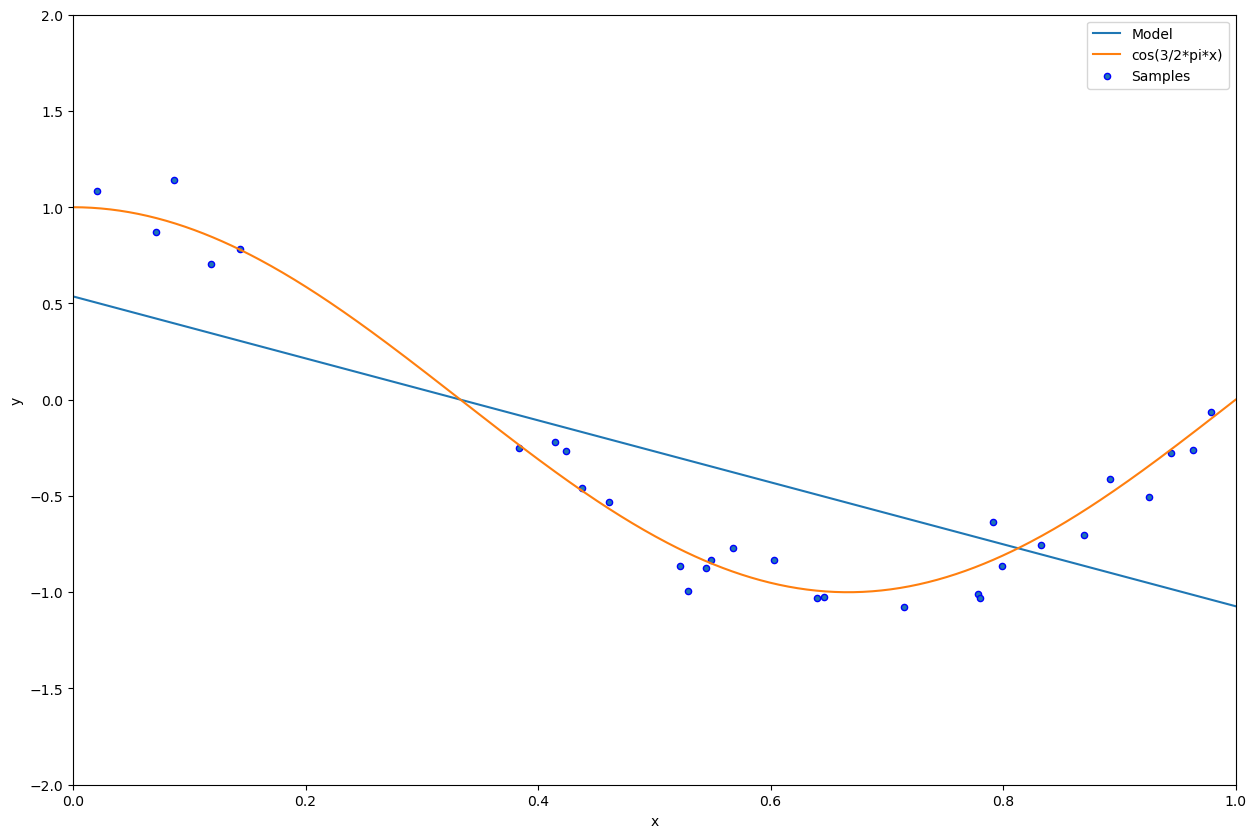

In [56]:
from sklearn.metrics import mean_squared_error

model_and_plot(1, X, y, X_test)


R2 score = 0.9966925529606241
MSE = 0.0015067787316724035


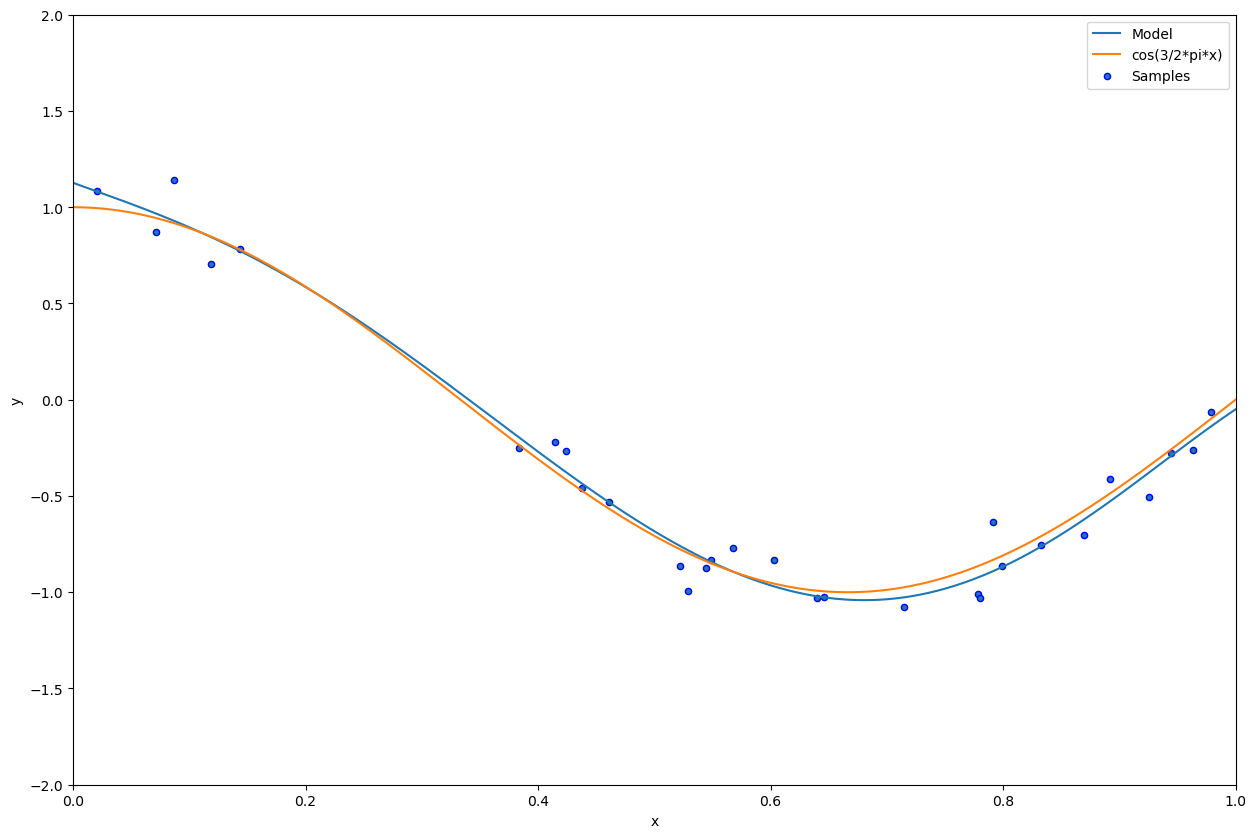

In [57]:
model_and_plot(5, X, y, X_test)


R2 score = 0.7199710787753337
MSE = 0.1275732060804547


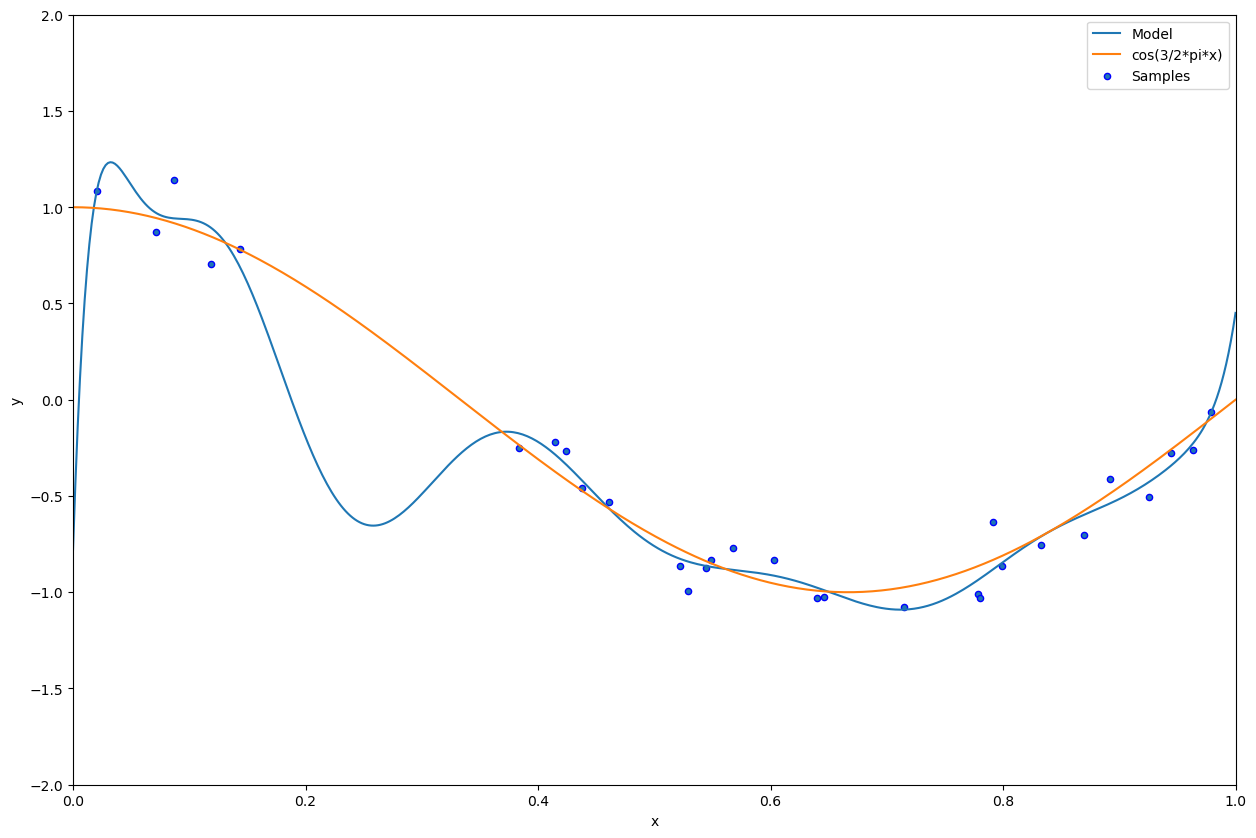

In [75]:
model_and_plot(13, X, y, X_test)


R2 score = 0.9960963797279281
MSE = 0.001778378287681707


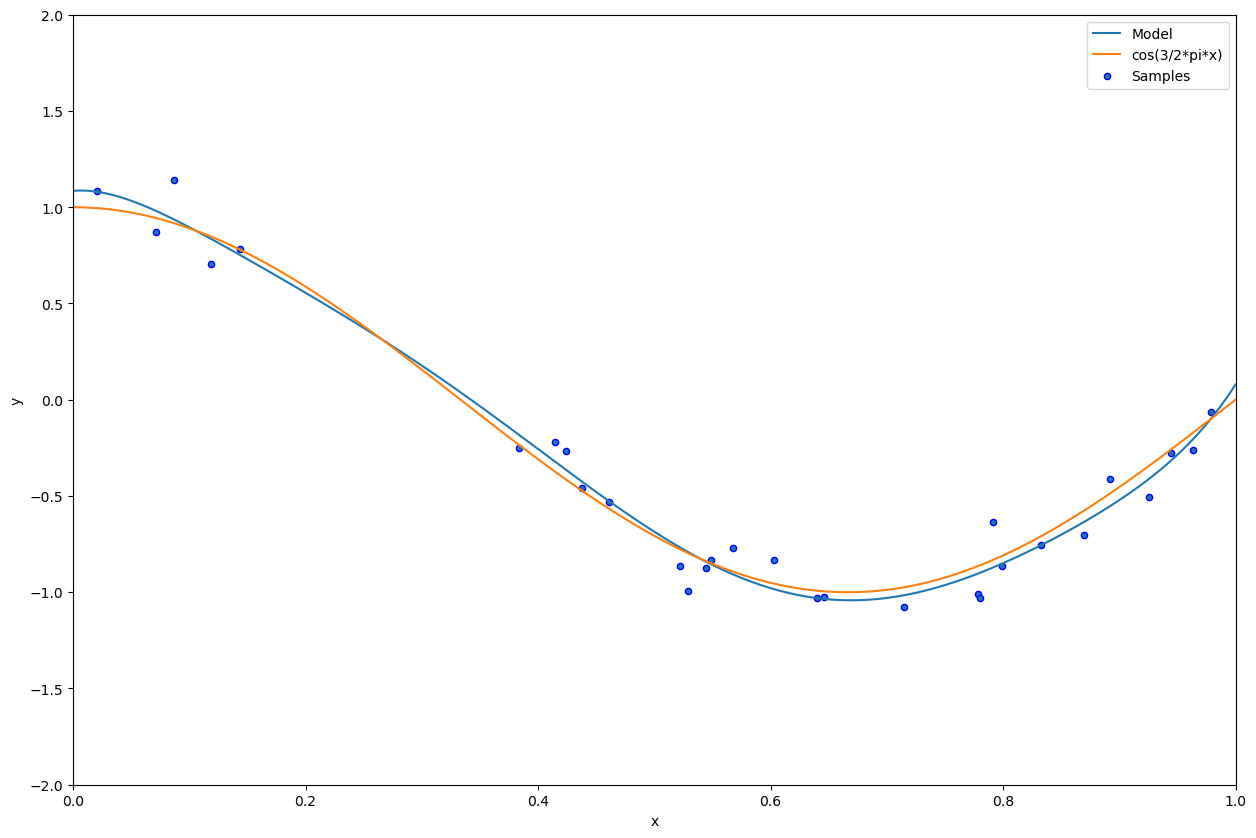

In [61]:

model_and_plot(7, X, y, X_test)


R2 score = 0.9914204868401414
MSE = 0.00390858199798046


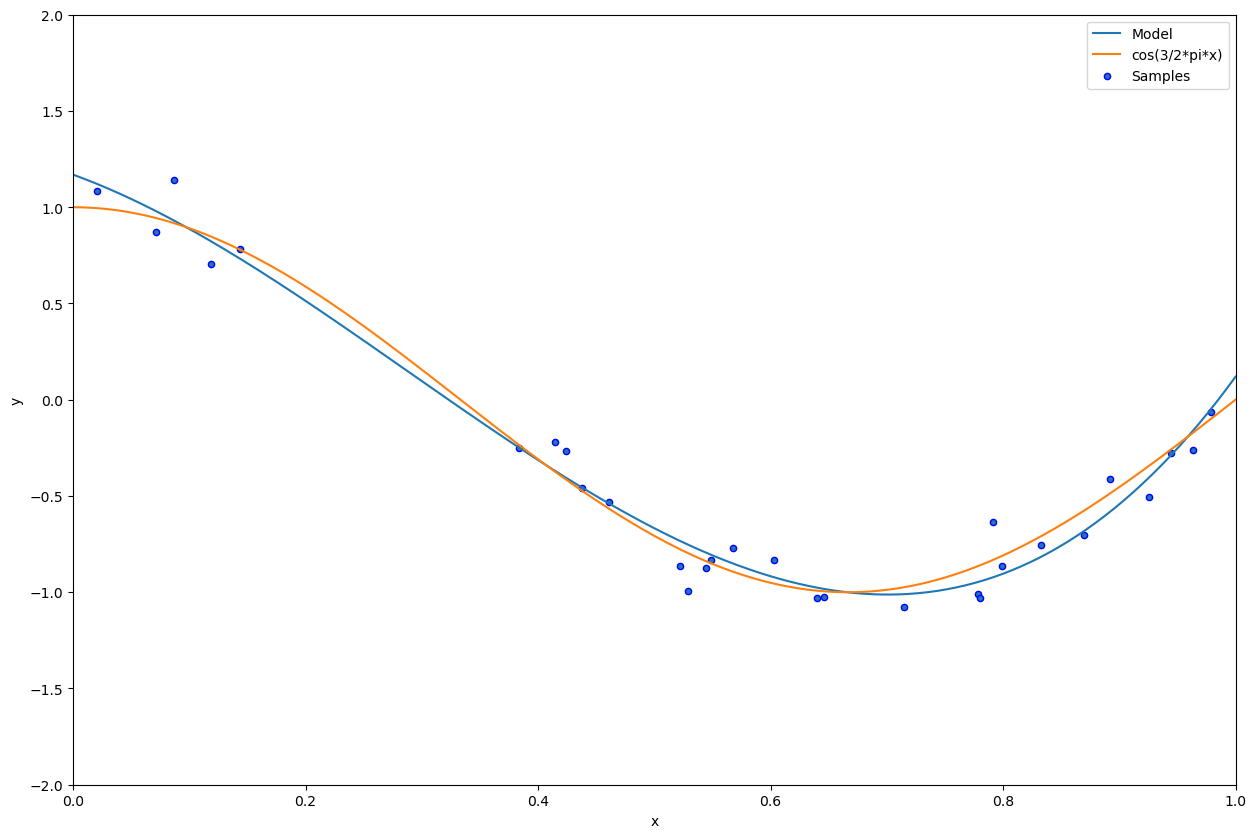

In [62]:
model_and_plot(3, X, y, X_test)


R2 score = 0.9852709191104132
MSE = 0.006710150021237995


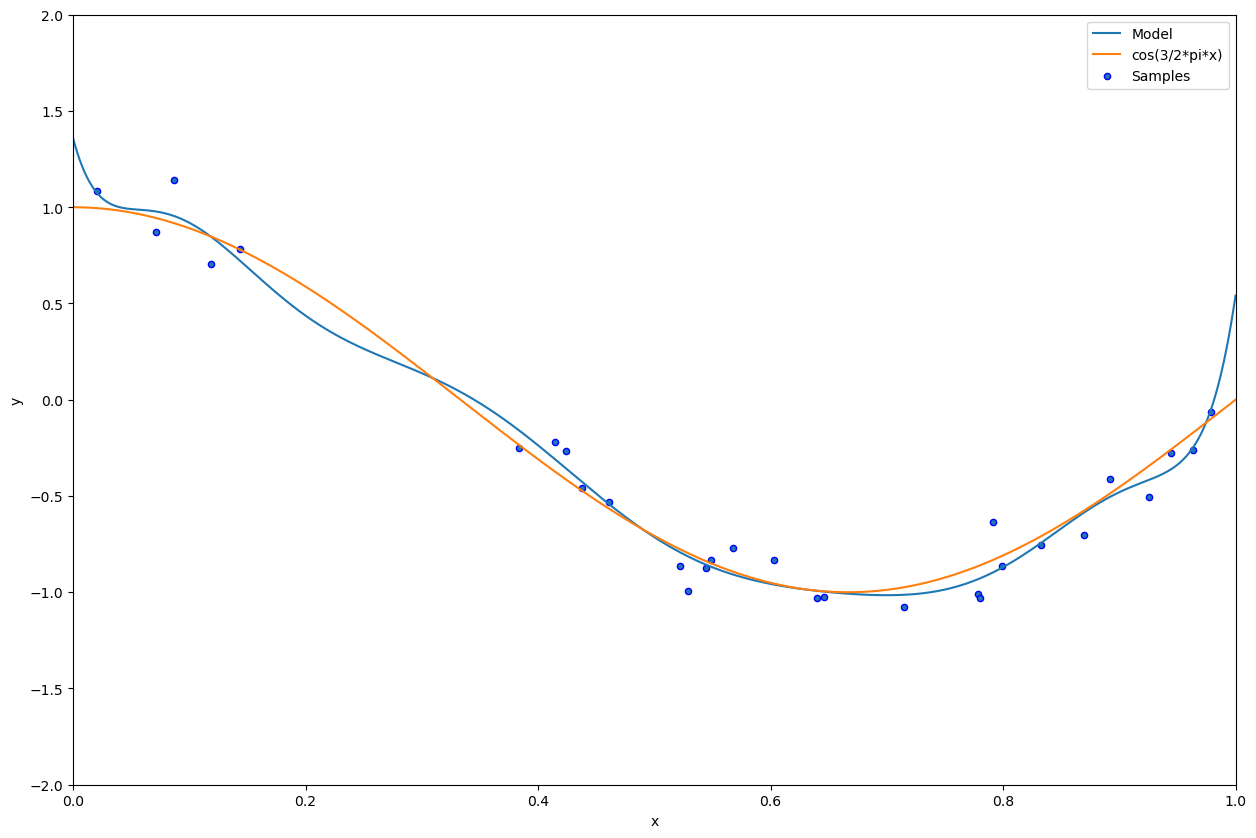

In [73]:
model_and_plot(10, X, y, X_test)


R2 score = -2.146509163453384
MSE = 1.4334600161575008


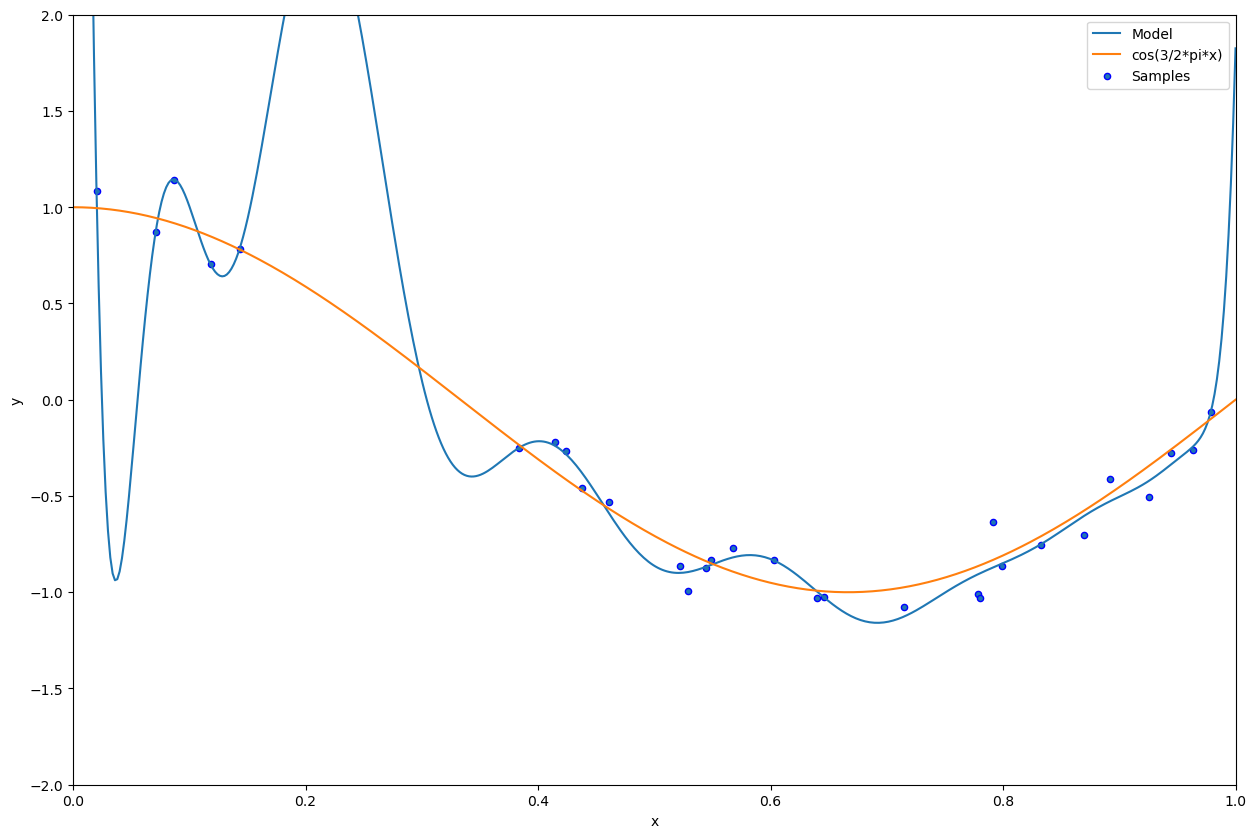

In [65]:
model_and_plot(17, X, y, X_test)


R2 score = -28.388342689335115
MSE = 13.388492452397909


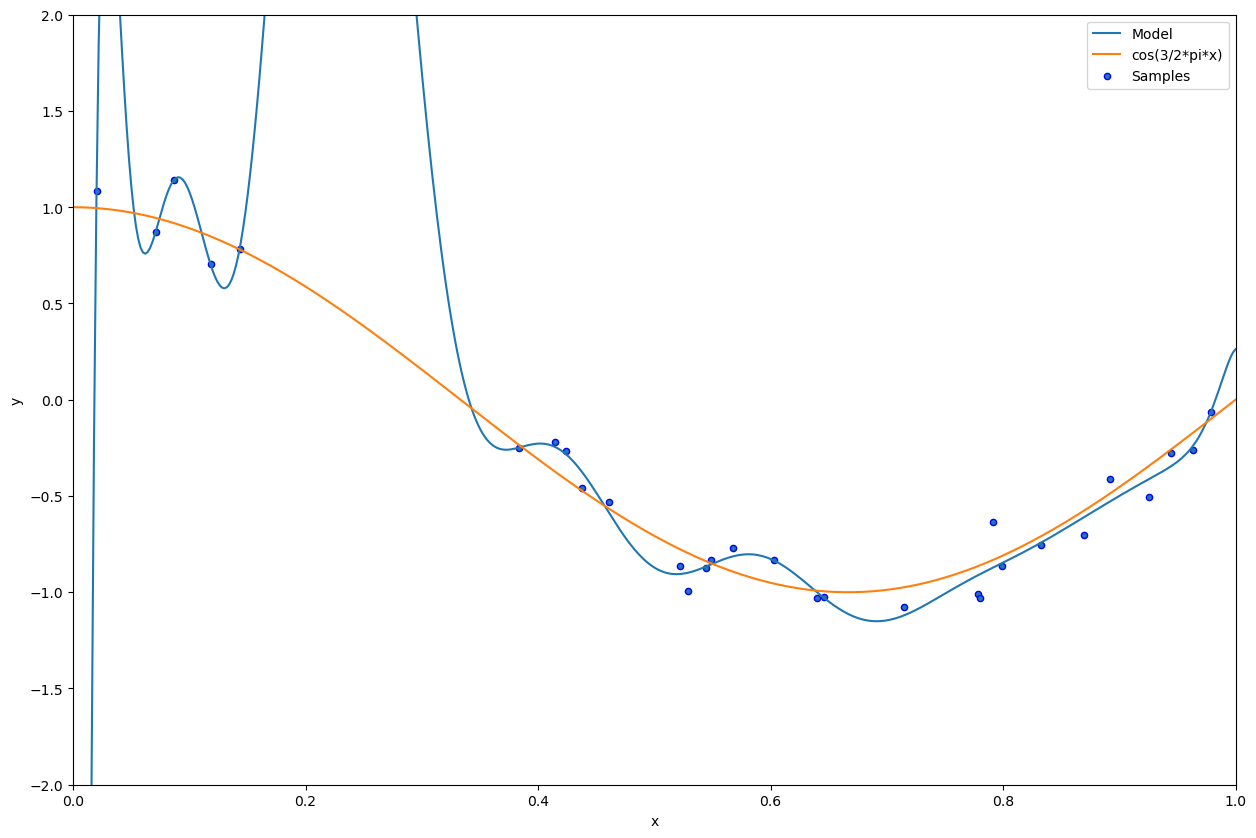

In [88]:
model_and_plot(18, X, y, X_test)

[0.18, 0.0015, 0.006, 0.0017, 0.0039, 0.12, 1.433]


Text(0, 0.5, 'MSE')

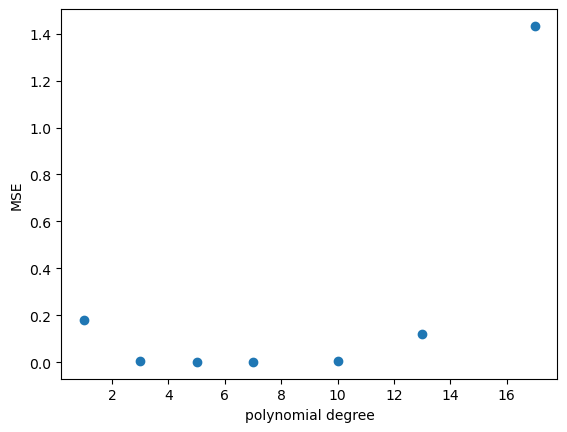

In [91]:
mse_array=[0.18, 0.0015, 0.006, 0.0017, 0.0039, 0.12,  1.433]
k_degree = [1, 5, 10, 7, 3, 13, 17]
print(mse_array)
plt.plot(k_degree,mse_array,'o')
plt.xlabel("polynomial degree")
plt.ylabel("MSE")
